# Life cycle impact of different bicycle frame materials

The notebook calculates the life cycle impacts of bicycles and ebikes.

* The future scenario is a 2°C electricity push scenario
* We only consider raw materials not the processing and manufacturing

In [ ]:
#to-does:




In [ ]:
# known issues


In [2]:
import pickle
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
import numpy as np
import math as ma
import warnings
import matplotlib.pyplot as plt

import pprint
import brightway2 as bw
import bw2io
import seaborn as sn
import json

%run -i ./script/helpers.py


warnings.filterwarnings('ignore')

year = 2030
scenario = "bike-lca_lca_Budg1100_ElecPush"

# xxxx change to elecera plus lifestyle

remind_report        = "data\\remind\\Budg1100_ElecEra_2020-09-17_17.17.49\\REMIND_generic_Budg1100_ElecEra_withoutPlus.mif"
lca_database         = "data\\lca\\brightway2-project-bike-lca_lca_Budg1100_ElecPush-backup.22-January-2021-08-54PM.tar.gz"
magpie_report        = "data\\magpie\\magpie_C_SDP-PkBudg1100-mag-4.mif"
literature_report    = "data\\bicycles_rule_plot_source.csv"
air_pollution_report = "data\\air_pollution\\results_dalys_SSP2_Budg1100_ElecEra_SSP2_IIASA_aneris_downscaling_.csv"
region_mapping_path  = "data\\regionmappingH12.csv"

edgetransport_moto_path       = "data\\edgeTransport\\EDGE_transport_moto_non_energy_cost.csv"
edgetransport_non_moto_path   = "data\\edgeTransport\\EDGE_transport_non_moto.csv"


gbd_location_mapping_path = "data\\GBD\\location_mapping.csv"
gbd_measure_mapping_path  = "data\\GBD\\measure_mapping.csv"
gbd_rei_mapping_path      = "data\\GBD\\rei_mapping.csv"
gbd_cause_mapping_path    = "data\\GBD\\cause_mapping.csv"
gbd_metric_mapping_path   = "data\\GBD\\metric_mapping.csv"

noise_eea_paths           = "data\\noise\\EEA_noise.csv"

GBD_path             = "data\\GBD\\GBD.json"

#obsolete
urban_population = "data\\pop.mif"

In [3]:
# read REMIND lca results
bw.restore_project_directory(lca_database)

Restoring project backup archive - this could take a few minutes...


'bike-lca_lca_Budg1100_ElecPush'

In [4]:
bw.projects.set_current(scenario)
bw.databases

Databases dictionary with 8 object(s):
	biosphere3
	ecoinvent 3.7 cutoff
	ecoinvent_remind_Budg1100_ElecPush_2020
	ecoinvent_remind_Budg1100_ElecPush_2025
	ecoinvent_remind_Budg1100_ElecPush_2030
	ecoinvent_remind_Budg1100_ElecPush_2035
	ecoinvent_remind_Budg1100_ElecPush_2040
	ecoinvent_remind_Budg1100_ElecPush_2050

In [5]:
ei = bw.Database("ecoinvent_remind_Budg1100_ElecPush_" + str(year))

In [11]:
[act for act in ei if "transport, passenger car" in act["name"]]




['transport, passenger car, fleet average, ICEV-g, 2030' (kilometer, EUR, None),
 'transport, passenger car, fleet average, HEV-p, 2030' (kilometer, SSA, None),
 'transport, passenger car, fleet average, ICEV-g, 2030' (kilometer, LAM, None),
 'market for transport, passenger car with internal combustion engine' (kilometer, RoW, None),
 'transport, passenger car, medium size, petrol, EURO 5' (kilometer, RER, None),
 'transport, passenger car, medium size, natural gas, EURO 4' (kilometer, RER, None),
 'transport, passenger car, large size, petrol, EURO 5' (kilometer, RER, None),
 'transport, passenger car, fleet average, BEV, 2030' (kilometer, CHA, None),
 'transport, passenger car, fleet average, ICEV-d, 2030' (kilometer, USA, None),
 'market for transport, passenger car, medium size, petrol, EURO 5' (kilometer, GLO, None),
 'transport, passenger car, medium size, natural gas, EURO 3' (kilometer, RER, None),
 'transport, passenger car, fleet average, PHEV-d, 2030' (kilometer, USA, None)

In [117]:
# frame materials
materials                    =        ["market for steel, low-alloyed, hot rolled",
                                       "market for steel, chromium steel 18/8, hot rolled", 
                                       "market for aluminium alloy, AlLi",   
                                       "market for titanium primary",
                                       "market for carbon fibre reinforced plastic"]



In [118]:
# fill a list with the relevant ecoinvent activities
acti = {}

for i in range(len(materials)):
    activity = str(materials[i])
    print(activity)
    
    acti[activity] = [act for act in ei if activity in act["name"]]

    

market for steel, low-alloyed, hot rolled
market for steel, chromium steel 18/8, hot rolled
market for aluminium alloy, AlLi
market for titanium primary
market for carbon fibre reinforced plastic


In [119]:
# calculate the lci and lca for the activities in acti

lca = {}
impact_category = ('IPCC 2013', 'climate change', 'GWP 100a')
for i in acti:
  
        for e in acti[i]:

            lca[e] = bw.LCA({e: 1}, (impact_category))
            lca[e].lci()
            lca[e].lcia()
            lca[e].score
            print(str(e) + ': '+  str(lca[e].score) + ' ' + str(impact_category))



'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None): 1.2012901567259042 ('IPCC 2013', 'climate change', 'GWP 100a')
'market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None): 3.1510299309709042 ('IPCC 2013', 'climate change', 'GWP 100a')
'market for aluminium alloy, AlLi' (kilogram, GLO, None): 6.885853103601761 ('IPCC 2013', 'climate change', 'GWP 100a')
'market for titanium primary, triple-melt' (kilogram, GLO, None): 15.4454232024795 ('IPCC 2013', 'climate change', 'GWP 100a')
'market for carbon fibre reinforced plastic, injection moulded' (kilogram, GLO, None): 51.04642415902489 ('IPCC 2013', 'climate change', 'GWP 100a')


In [120]:
def modes(lca):
    lca_impacts = {}
    fd   = pd.DataFrame()



    for i in lca:
      
        for m in methods:
        
            lca[i].switch_method(m)    
            lca[i].lcia()
            lca_impacts[m[1]] = lca[i].score

            
        full = pd.DataFrame.from_dict(lca_impacts, orient="index",  columns=[str(i)])
        fd[str(i)]=full[str(i)]
        
        fd.index.name = "indicator"
        fd.columns.name = "materials"
    return fd

Text(0.5, 1.0, 'Global warming potential of frame raw materials [kg CO2-Eq / kg] \n Budget 1100 Elec push 2030')

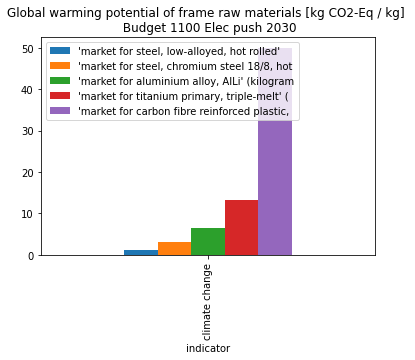

In [151]:
methods = [m for m in bw.methods if "ReCiPe Midpoint (H) V1.13', 'climate change', 'GWP100" in str(m) and "w/o LT" not in str(m) and "no LT" not in str(m)]
data = modes(lca)
data = data.rename(columns = lambda x : str(x)[:44])
data.plot.bar()
plt.legend(loc = 2)
plt.title('Global warming potential of frame raw materials [kg CO2-Eq / kg] \n Budget 1100 Elec push ' + str(year))
#plt.savefig("plot/impact_frame_materials_"+str(year)+".pdf", bbox_inches='tight')
